In [3]:
!pip install prophet

  Using cached holidays-0.17-py3-none-any.whl (187 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.4 which is incompatible.


In [5]:
import pandas as pd
df = pd.read_csv("aviation_data_merged.csv")
df=df[:-36]
df.head()

,date,hour,runway,weather,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
0,1/1/22,0.0,22L | 22R,IMC,5,10,15,0,0,0,...,0.0,66.67,110.50,12.00,0.00,109.5,3.22,4.22,2.89,14.22
1,1/1/22,1.0,22L | 22R,IMC,2,3,5,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,1/1/22,2.0,22L | 22R,IMC,0,0,0,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
3,1/1/22,3.0,22L | 22R,IMC,1,1,2,0,0,0,...,0.0,60.00,0.00,0.00,0.00,0.0,1.00,0.98,3.60,43.80
4,1/1/22,4.0,22L | 22R,IMC,0,2,2,0,0,0,...,100.0,66.67,0.25,14.25,2.15,1.0,15.83,2.20,18.67,38.50


In [6]:
from prophet import Prophet

In [17]:
temp=pd.DataFrame({'ds': df['date'],'y':df.total_demand_units})
temp

,ds,y
0,1/1/22,16
1,1/1/22,5
2,1/1/22,0
3,1/1/22,2
4,1/1/22,2
...,...,...
5796,8/30/22,51
5797,8/30/22,48
5798,8/30/22,53
5799,8/30/22,63


In [18]:
m = Prophet()
m.fit(temp)

18:42:01 - cmdstanpy - INFO - Chain [1] start processing
18:42:02 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
602,2023-08-26
603,2023-08-27
604,2023-08-28
605,2023-08-29
606,2023-08-30


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
602,2023-08-26,18.790509,-52.029671,89.238248
603,2023-08-27,33.926957,-36.008631,97.249257
604,2023-08-28,34.535255,-37.142285,101.213719
605,2023-08-29,36.848189,-31.815190,105.890480
606,2023-08-30,35.934967,-34.366923,102.061790


In [21]:
import plotly.express as px

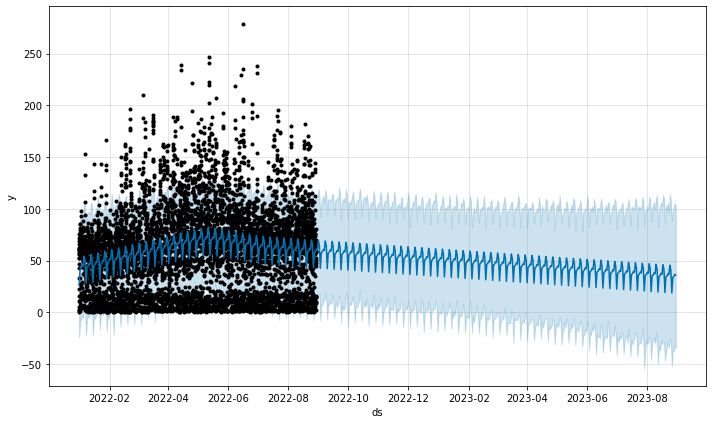

In [22]:
fig1 = m.plot(forecast)

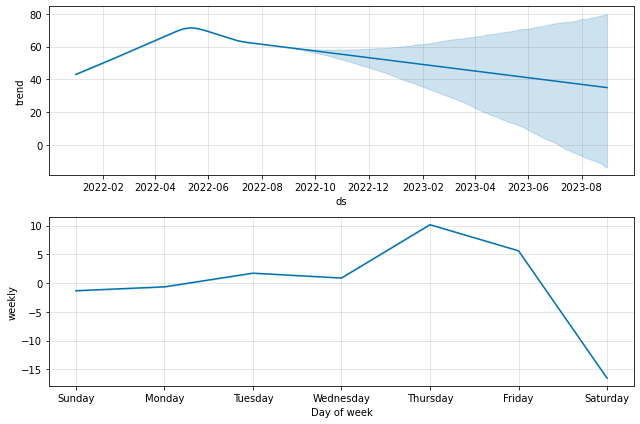

In [23]:
fig2 = m.plot_components(forecast)

In [24]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [25]:
plot_components_plotly(m, forecast)

In [26]:
df.head()

,date,hour,runway,weather,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
0,1/1/22,0.0,22L | 22R,IMC,5,10,15,0,0,0,...,0.0,66.67,110.50,12.00,0.00,109.5,3.22,4.22,2.89,14.22
1,1/1/22,1.0,22L | 22R,IMC,2,3,5,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,1/1/22,2.0,22L | 22R,IMC,0,0,0,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
3,1/1/22,3.0,22L | 22R,IMC,1,1,2,0,0,0,...,0.0,60.00,0.00,0.00,0.00,0.0,1.00,0.98,3.60,43.80
4,1/1/22,4.0,22L | 22R,IMC,0,2,2,0,0,0,...,100.0,66.67,0.25,14.25,2.15,1.0,15.83,2.20,18.67,38.50
